<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В таблице 22 столбца:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Вывод

При изучении датасета можно заметить следующие проблемы:
1. Пропуски во многих столбцах, а именно: `ceiling_height`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_nearest`, `days_exposition`, `floors_total`, `locality_name`, `ponds_around3000`. Можно предположить, что пропуски в столбцах с количеством балконов, количеством парков и водоёмов в радиусе 3 км говорят о том, что их нет, поэтому пропуски в этих столбцах можно заменить нулём. Также можно предположить, что квартиры с пропусками в столбце `days_exposition` не проданы и объявления до сих пор размещены;
2. В столбце `first_day_exposition` тип данных object, а не datetime;
3. Вещественные числа вместо целочисленных в столбцах `floors_total`, `parks_around3000`, `ponds_around3000`, `days_exposition`, `balcony`;
4. В столбце `is_apartment` тип данных object, а не bool;
5. Верблюжий регистр в названии столбца `cityCenters_nearest`;
6. Минимальное количество комнат в квартире — 0, максимальное количество комнат — 19. Возможно, квартиры с 0 комнатами — студии или апартаменты;
7. Максимальная высота потолков — 100 метров, минимальная высота потолков — 1 метр;
8. Минимальная жилая площадь — 2 метра;
9. Минимальная площадь кухни — 1 метр, максимальная площадь — 112;
10. Расстояние до ближайшего аэропорта — 0 метров.

Для проверки гипотез нам понадобятся столбцы `last_price`, `total_area`, `first_day_exposition`, `floor`, `floors_total`, `kitchen_area`, `living_area`, `total_area`, `rooms`, `ceiling_height`, `days_exposition`, `cityCenters_nearest`, `locality_name`. Поэтому нужно привести эти столбцы в порядок, если это необходимо.

## Предобработка данных

Сначала изменим название столбца `cityCenters_nearest`.

In [4]:
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

Перейдём к устранению пропусков. Подсчитаем количество пропущенных значений в каждом столбце.

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Начнём со столбцов `balcony`, `parks_around3000`, `ponds_around3000`. Скорее всего, пропуски в этих столбцах обозначают, что балконов, парков и водоёмов нет, поэтому заменим пропущенные значения нулём.

In [6]:
df['balcony'] = df['balcony'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

В столбце с высотой потолков 9195 пропусков. Мы не можем удалить строки с пропусками, т.к. потеряем слишком много данных. Посмотрим, как коррелирует высота потолков с другими данными.

In [7]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.048903,-0.002298,-0.047666,0.037085,-0.008347,0.011323,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.008559,-0.026239,-0.206747,0.197840,-0.016414,0.208621,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.009941,-0.030753,-0.231446,0.200211,-0.021497,0.200294,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,-0.015519,-0.061199,-0.184864,0.157495,-0.054549,0.121276,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.031216,-0.023947,-0.091689,0.062216,-0.019167,0.072343,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.172812,0.108288,0.019774,-0.158775,0.097527,-0.048698,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,-0.014772,-0.057912,-0.231368,0.212357,-0.050167,0.182439,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168567,0.071597,0.009084,-0.105212,0.073045,-0.029710,0.024850,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.028899,-0.021876,-0.007029,-0.032014,0.009134,-0.009690,0.002606,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.032639,-0.013583,-0.004204,-0.016378,0.010612,-0.004127,-0.003328,-0.024112


Высота потолков почти не связана с другими параметрами. В таком случае, не будем заполнять пропуски.

Перейдём к столбцу `living_area`. По матрице корреляции видна сильная связь между общей площадью и жилой площадью. Заменим пропуски медианным значением жилой площади по целочисленным уникальным значениям общей площади.

In [8]:
for area in df['total_area'].astype('int').unique():
    median = df.loc[df['total_area'].astype('int') == area, 'living_area'].median().round(2)
    df.loc[df['total_area'].astype('int') == area, 'living_area'] = df['living_area'].fillna(median)

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

Теперь заполним пропуски в столбце `kitchen_area`. Наибольшая корреляция наблюдается между общей площадью и площадью кухни. Узнаем, какую долю занимает кухня в квартирах разного размера. Заполним пропуски, умножив общую площадь квартиры на соответствующую долю.

In [ ]:
def fill_kitchen_area(area):
    if area <= 40:
        return((area * (df.query('total_area <= 40')['kitchen_area'] / df.query('total_area <= 40')['total_area']).median()).round(2))
    if area <= 52:
        return((area * (df.query('total_area > 40 and total_area <= 52')['kitchen_area'] / df.query('total_area > 40 and total_area <= 52')['total_area']).median()).round(2))
    if area <= 70:
        return((area * (df.query('total_area > 52 and total_area <= 70')['kitchen_area'] / df.query('total_area > 52 and total_area <= 70')['total_area']).median()).round(2))
    return((area * (df.query('total_area > 70')['kitchen_area'] / df.query('total_area > 70')['total_area']).median()).round(2))

df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'].apply(fill_kitchen_area))

Удалим пропуски в столбцах `floors_total`, `living_area`.

In [10]:
df = df.dropna(subset=['floors_total']).reset_index(drop=True)
df = df.dropna(subset=['living_area']).reset_index(drop=True)

Изменим типы данных в столбцах `floors_total`, `parks_around3000`, `ponds_around3000`, `balcony` на целочисленный.

In [11]:
columns_to_int = ['floors_total', 'parks_around3000', 'ponds_around3000', 'balcony']
for column in columns_to_int:
    df[column] = df[column].astype('int')

Изменим тип данных в столбце `first_day_exposition`.

In [12]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Изменим тип данных в столбце `is_apartment`.

In [13]:
df['is_apartment'] = df['is_apartment'].astype('bool')

### Вывод

В столбцах `ceiling_height`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_nearest`, `days_exposition`, `floors_total`, `locality_name`, `ponds_around3000` были обнаружены пропуски. 

Пропущенные значения в столбцах `balcony`, `parks_around3000`, `ponds_around3000` были заполнены нулём, т.к. пропуски в этих столбцах говорят о том, что балконов, парков и водоёмов нет. 

Высота потолков не связана с другими параметрами датафрейма. Скорее всего, она зависит от года постройки, но этих данных у нас нет. Поэтому в данном случае мы не можем корректно заполнить пропуски.

Жилая площадь и площадь кухни коррелируют с общей площадью. Пропуски в столбце `living_area` были заполнены медианным значением жилой площади для каждого уникального целочисленного значения общей площади, а пропуски в столбце `kitchen_area` — медианной долей кухни в квартирах разного размера.

Также мы заменили название столбца `cityCenters_nearest` на `city_centers_nearest` и изменили типы данных: в столбцах `floors_total`, `parks_around3000`, `ponds_around3000`, `balcony` — на целочисленный, `first_day_exposition` — на datetime, `is_apartment` — на булев тип.

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу цену квадратного метра. Для этого разделим стоимость квартиры на общую площадь.

In [14]:
df['square_meter_price'] = df['last_price'] / df['total_area']

Добавим день недели, месяц и год публикации объявления.

In [15]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Добавим этаж квартиры.

In [16]:
def floor_category(row):
    if row[8] == 1:
        return('первый')
    if row[6] == row[8]:
        return('последний')
    return('другой')

df['floor_category'] = df.apply(floor_category, axis=1)

Теперь найдём соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [17]:
df['living_area_to_total'] = df['living_area'] / df['total_area']
df['kitchen_area_to_total'] = df['kitchen_area'] / df['total_area']

### Вывод

В таблицу были добавлены столбцы с ценой за квадратный метр, днём недели, месяцем и годом публикации объявления, категорией этажа, на котором расположена квартира, отношением жилой площади к общей и соотношением площади кухни и общей площади.

## Исследовательский анализ данных

Построим гистограмму по площадям квартир.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd8eb64690>]],
      dtype=object)

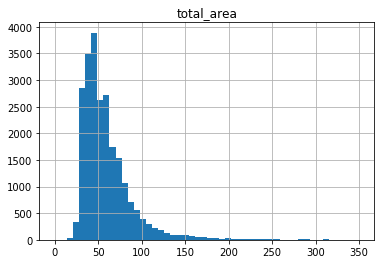

In [18]:
df.hist('total_area', bins=50, range=(0, 350))

Итак, по гистограмме видно, что большинство квартир имеют площадь 30-60 кв.м, пик приходится на 45 кв.м. Квартир меньше 25 квадратных метров очень мало. Также можно заметить, что после 60 кв. метров число квартир резко убывает, превращаясь в еле заметный "хвост" после 125 кв.м.

Теперь изучим цены квартир.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd8b4befd0>]],
      dtype=object)

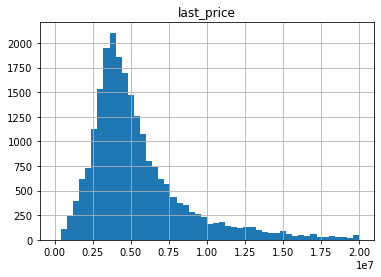

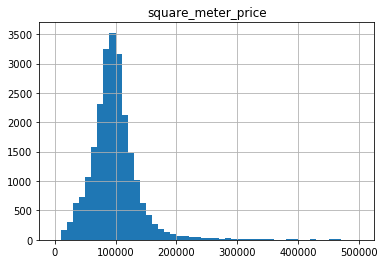

In [20]:
df.hist('last_price', bins=50, range=(0, 20000000))
df.hist('square_meter_price', bins=50, range=(0, 500000))

Гистограмма стоимости квартир скошена вправо и имеет пик в районе 4 миллионов. Квартиры дешевле миллиона и дороже 10 миллионов встречаются редко. Также крайне редко можно увидеть квартиру со стоимостью квадратного метра больше 250 000.

Теперь построим гистограмму по числу комнат.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd82c8f310>]],
      dtype=object)

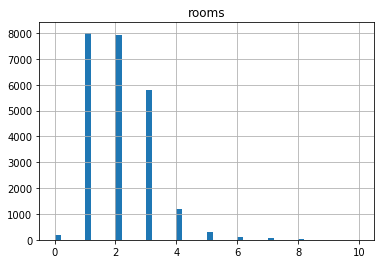

In [27]:
df.hist('rooms', bins= 50, range=(0, 10))

Чаще всего встречаются однокомнатные и двухкомнатные квартиры. Квартиры с тремя комнатами встречаются реже. Квартир с 0 и 4 и больше комнатами очень мало.

Перейдём к изучению высоты потолков.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd82c56d50>]],
      dtype=object)

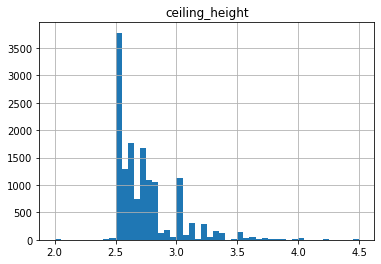

In [28]:
df.hist('ceiling_height', bins=50, range=(2, 4.5))

Пик приходится на 2.5 метра. Удивительно, но встречаются и квартиры с высотой потолков меньше 2.5 метров, хоть и крайне редко. 

Построим гистограмму времени продажи квартир.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd82cf1c90>]],
      dtype=object)

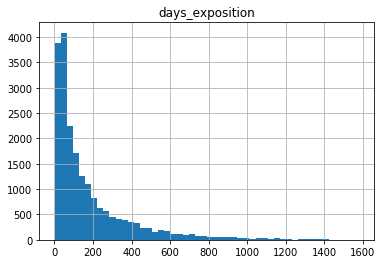

In [29]:
df.hist('days_exposition', bins=50)

Посчитаем среднее время продажи квартир и медиану.

In [30]:
print('Среднее время продажи квартир:', df['days_exposition'].mean())
print('Медианное время продажи квартир:', df['days_exposition'].median())

Среднее время продажи квартир: 180.86092617975328
Медианное время продажи квартир: 95.0


Построим диаграмму размаха, чтобы точно определить обычное время продажи.

(-50, 600)

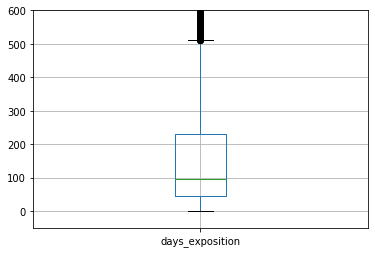

In [31]:
df.boxplot('days_exposition')
plt.ylim(-50, 600)

Итак, мы ожидали увидеть падение в ноль слева от пика, не доходя до нуля, но видим обратное — пик на 45 дней и большое количество значений слева от пика. Среднее значение и медиана отличаются почти в два раза. Это говорит о том, что в данных встречаются аномально большие значения, влияющие на среднее, но не на медиану. Большая часть квартир продаётся за срок от 45 дней до 232 дней. Тогда очень быстрой продажей можно считать сделку, совершенную в срок до 45 дней, а долгой — больше 232 дней.

Уберём выбивающиеся значения и построим гистограммы, чтобы убедится, что выбивающихся значений не осталось.

In [35]:
df_query = df.query('total_area >= 20 & total_area <= 150')
df_query = df_query.query('square_meter_price >= 20000 & square_meter_price <= 250000')
df_query = df_query.query('last_price <= 20000000')
df_query = df_query.query('rooms <= 5')
df_query = df_query.query('ceiling_height >= 2.5 & ceiling_height <= 4.5')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd825b24d0>]],
      dtype=object)

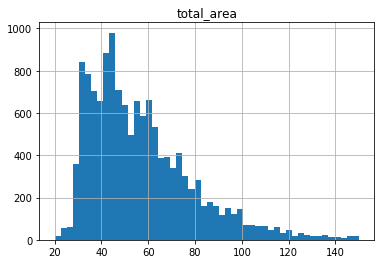

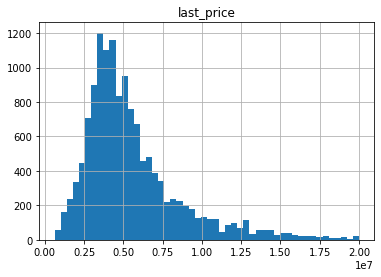

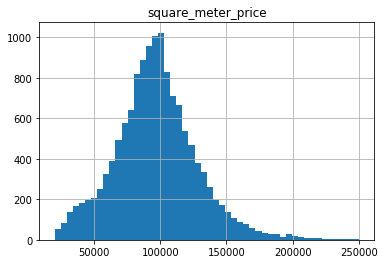

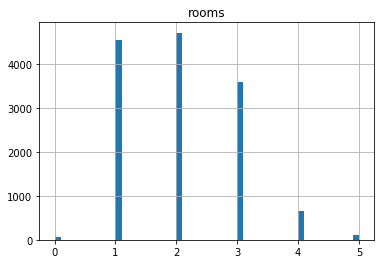

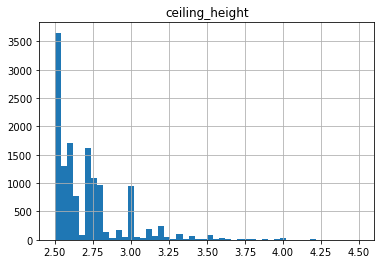

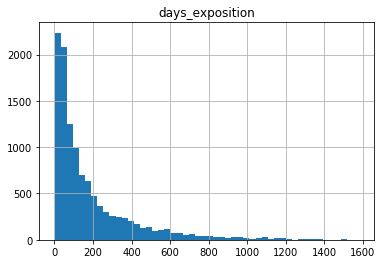

In [36]:
df_query.hist('total_area', bins=50)
df_query.hist('last_price', bins=50)
df_query.hist('square_meter_price', bins=50)
df_query.hist('rooms', bins=50)
df_query.hist('ceiling_height', bins=50)
df_query.hist('days_exposition', bins=50)

Все выбивающиеся значения были исключены. Узнаем, какие факторы больше всего влияют на стоимость квартиры. Сначала узнаем, влияют ли площадь квартиры, число комнат и удалённость от центра на цену квартиры.

In [37]:
df_query[['square_meter_price', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,square_meter_price,total_area,rooms,city_centers_nearest
square_meter_price,1.000000,0.080679,-0.132159,-0.397446
total_area,0.080679,1.000000,0.791727,-0.199599
rooms,-0.132159,0.791727,1.000000,-0.124975
city_centers_nearest,-0.397446,-0.199599,-0.124975,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdf1bc9490>,
      dtype=object)

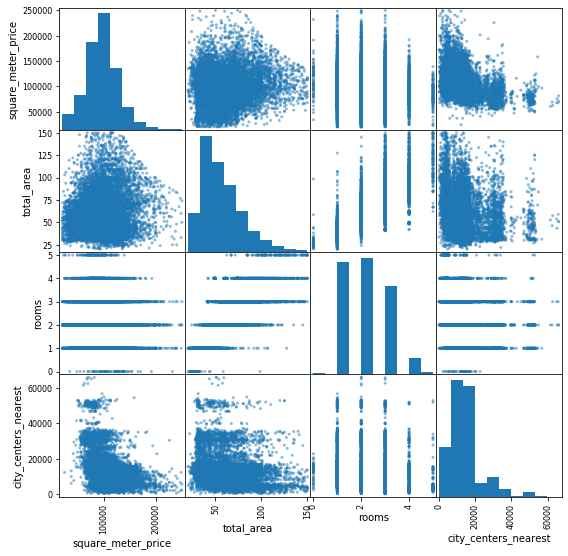

In [38]:
pd.plotting.scatter_matrix(df_query[['square_meter_price', 'total_area', 'rooms', 'city_centers_nearest']], figsize=(9, 9))

Сильной связи между стоимостью квартиры и площадью квартиры, количеством комнат или удалённостью от центра нет. Наиболее сильная отрицательная корреляция наблюдается между ценой квартиры и расстоянием до центра, т.е. чем больше расстояние до центра города, тем меньше стоимость квадратного метра. Также можно заметить, что в центре разброс цен больше, чем на окраинах.

Теперь изучим зависимость цены от этажа, на котором расположена квартира. Обозначим квартиры на первом этаже цифрой 1, на другом этаже — цифрой 2, на последнем этаже — 3. 

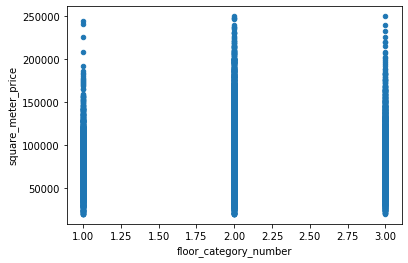

In [39]:
def floor_category_number (floor_category):
    if floor_category == 'первый':
        return(1)
    if floor_category == 'последний':
        return(3)
    return(2)

df_query['floor_category_number'] = df_query['floor_category'].apply(floor_category_number)
df_query.plot(x='floor_category_number', y='square_meter_price', kind='scatter')

Можно заметить, что медианная стоимость квадратного метра квартиры, расположенной на первом этаже, меньше других. А самые дорогие квартиры расположены на средних этажах.

Теперь изучим зависимость цены от даты размещения.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd81bfeb50>,
      dtype=object)

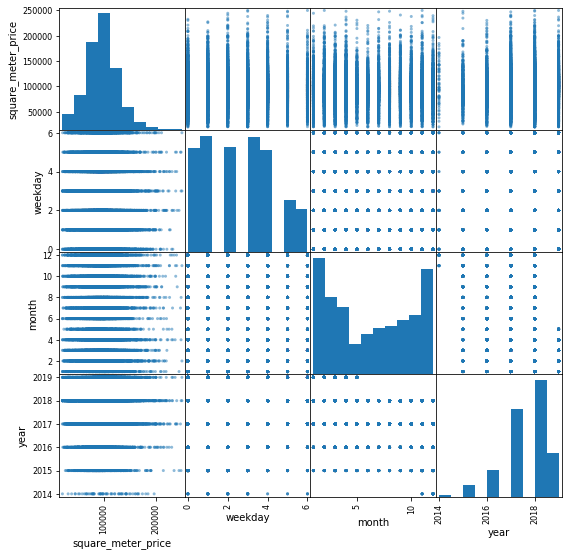

In [40]:
pd.plotting.scatter_matrix(df_query[['square_meter_price', 'weekday', 'month', 'year']], figsize=(9, 9))

Сильной корреляци между ценой квартиры и датой размещения не наблюдается. Но можно заметить, что наименьший разброс цен за квадратный метр был в 2014 году, а наибольший в 2018 и 2019.

Выберем 10 населённых пунктов с наибольшим числом объявлений, посчитаем среднюю стоимость квадратного метра в них.

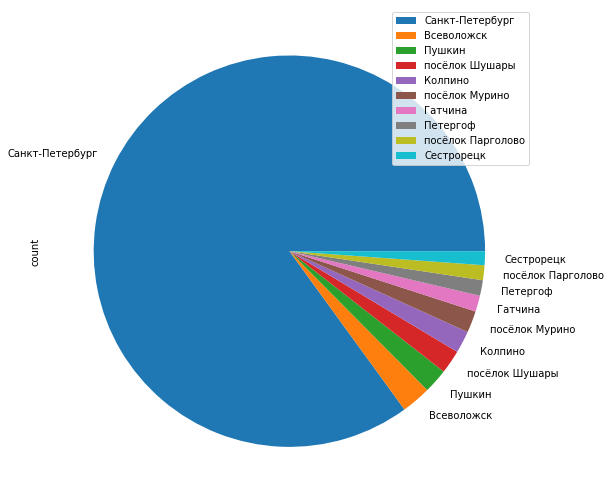

In [41]:
top_locality = df_query[['locality_name', 'square_meter_price']].pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean'])
top_locality.columns = ['count', 'mean_sq_m_price']
top_locality = top_locality.sort_values(by='count', ascending=False).head(10)
top_locality.plot(y='count', kind='pie', figsize=(9,  9))

Построим график с уровнем цен по разным населённым пунктам.

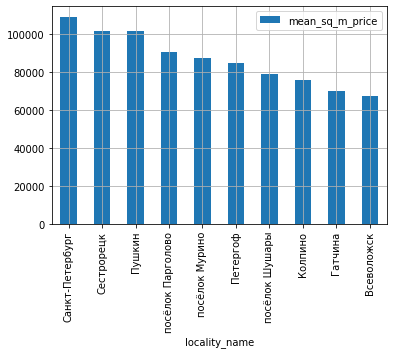

In [42]:
top_locality.sort_values(by='mean_sq_m_price', ascending=False).plot(y='mean_sq_m_price', grid=True, kind='bar')

Самая высокая цена за квадратный метр в Санкт-Петербурге и Сестрорецке, а самая низкая в Гатчине и Всеволожске.

Теперь выясним, какая область входит в центр Санкт-Петербурга. Создадим столбец с расстоянием до центра в километрах, посчитаем среднюю цену квадратного метра для каждого километра и построим график, отражающий зависимость цены от удалённости от центра.

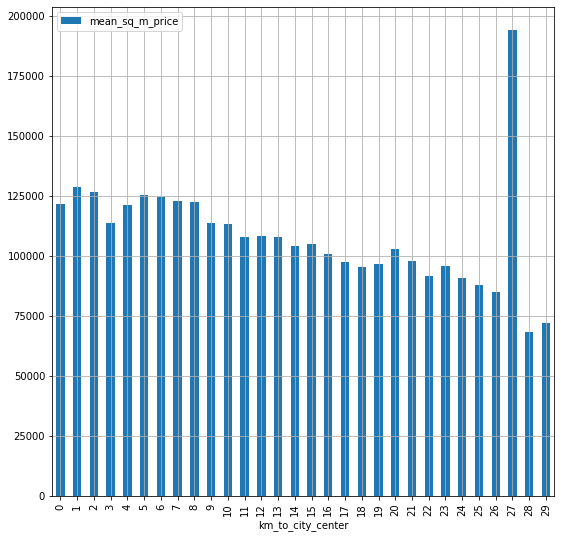

In [43]:
city_center = df_query.query('locality_name == "Санкт-Петербург"').dropna(subset=['city_centers_nearest']).reset_index(drop=True)
city_center['km_to_city_center'] = (city_center['city_centers_nearest'] / 1000).round().astype('int')
city_center['mean_sq_m_price'] = city_center.groupby('km_to_city_center')['square_meter_price'].transform('mean').round().astype('int')
city_center.pivot_table(index='km_to_city_center', values='mean_sq_m_price').plot(kind='bar', grid=True, figsize=(9, 9))

До 8 км цены находятся примерно на одном уровне, не считая третьего километра, с 8 км начинается резкий спад цен. Поэтому будем считать центральной областью всё с 0 по 8 км.

Проанализируем сегмент квртир в центре. Изучим площадь квартир, цену, количсетво комнат и высоту потолков.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd7b71f190>]],
      dtype=object)

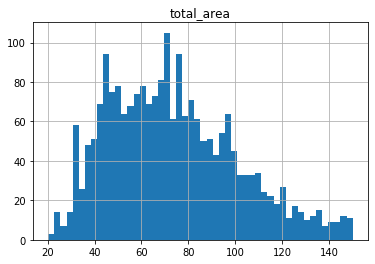

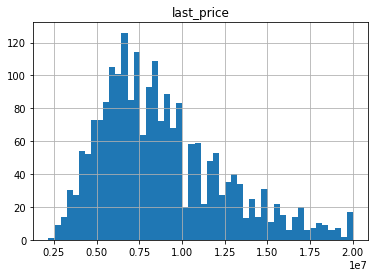

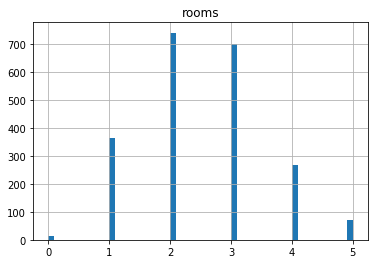

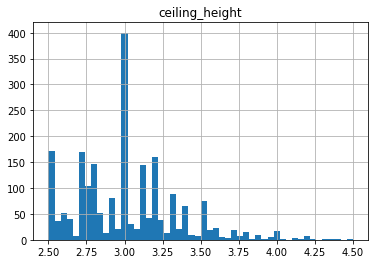

In [48]:
city_center = city_center.query('km_to_city_center <= 8')
city_center.hist('total_area', bins=50)
city_center.hist('last_price', bins=50)
city_center.hist('rooms', bins=50)
city_center.hist('ceiling_height', bins=50)

Изучая гистограммы, можно сделать следующие выводы:
1. По гистограмме по площадям квартир виден большой разброс "популярных" метражей — большая часть квартир имеют площадь 40-80 кв.м. Пик находится около 70 кв.м. 
2. Разброс цен также довольно большой — чаще всего встречаются квартиры за 5-10 млн, пик приходится примерно на 6.5 млн. 
3. В большей части квартир 2 комнаты, чуть реже встречаются трёхкомнатные квартиры. Квартир с 0 и 5 комнатами практически нет. 
4. В подавляющем большинстве квартир высота потолков составляет 3 м. 

Узнаем, как на стоимость квартир в центре влияют число комнат, этаж, удалённость от центра и дата размещения объявления. Сравним выводы с выводами по всей базе.

In [49]:
city_center[['square_meter_price', 'rooms', 'city_centers_nearest']].corr()

,square_meter_price,rooms,city_centers_nearest
square_meter_price,1.000000,-0.384856,0.006391
rooms,-0.384856,1.000000,-0.228085
city_centers_nearest,0.006391,-0.228085,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd7b6dbd50>,
      dtype=object)

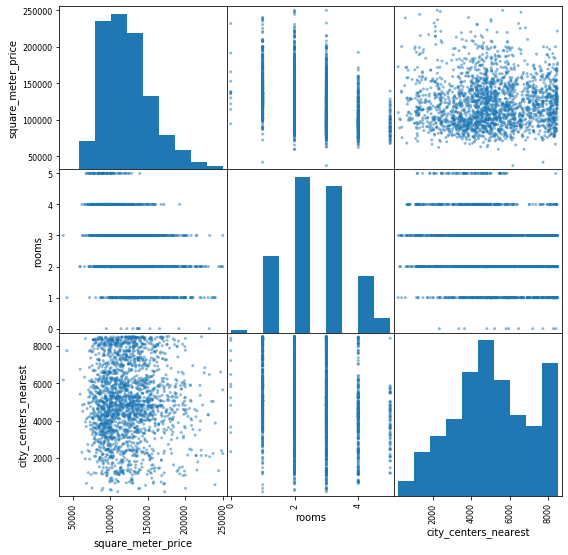

In [50]:
pd.plotting.scatter_matrix(city_center[['square_meter_price', 'rooms', 'city_centers_nearest']], figsize=(9, 9))

Сильной связи между стоимостью квадратного метра, количеством комнат и удалённостью от центра нет. Наибольшая, причём отрицательная, корреляция наблюдается между количеством комнат и ценой квартиры: с двухкомнатных квартир по пятикомнатные видна отрицательная зависимость — чем больше комнат, тем дешевле квадратный метр.

Выводы по всем данным были другими: сильной зависимости между этими параметрами также не было, но наиболее сильная отрицательная корреляция наблюдалась между стоимостью квадратного метра и удалённостью от центра. Корреляция между ценой и количеством комнат была более слабой.

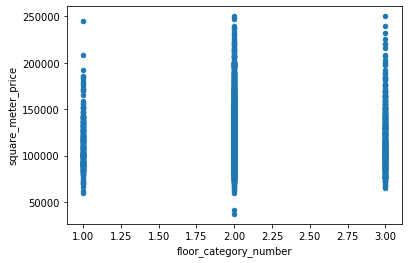

In [51]:
def floor_category_number (floor_category):
    if floor_category == 'первый':
        return(1)
    if floor_category == 'последний':
        return(3)
    return(2)

city_center['floor_category_number'] = city_center['floor_category'].apply(floor_category_number)
city_center.plot(x='floor_category_number', y='square_meter_price', kind='scatter')

По зависимости цены квартиры от этажа выводы похожи на общие: самые дорогие квартиры расположены на средних этажах, а медианная стоимость квартиры на первом этаже меньше остальных. Также можно заметить, что у квартир на средних этажах наибольший разброс цен.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd7b7fbf50>,
      dtype=object)

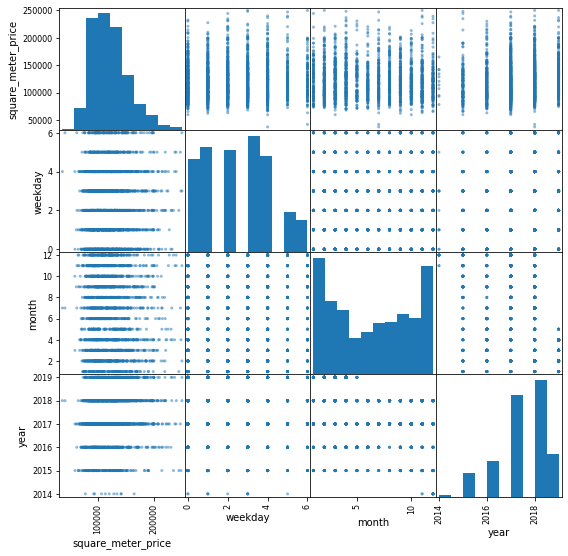

In [52]:
pd.plotting.scatter_matrix(city_center[['square_meter_price', 'weekday', 'month', 'year']], figsize=(9, 9))

Сильной связи между датой размещения объявления и ценой квартиры не наблюдается, но можно заметить, что наименьший разброс цен был в 2014, а наибольший — в 2018. 

В общих выводах также не было связи между датой размещения и ценой, но годы с наибольшим разбросом цен были другими: 2018 и 2019.

### Вывод

Итак, общие выводы похожи на выводы по центру Санкт-Петербурга:
1. Сильной корреляции между ценой за квадратный метр и другими параметрами нет. 
2. Квартиры на средних этажах дороже квартир на первом и последем этажах.

Но есть и отличие: на стоимость квартиры в центре Санкт-Петербурга сильнее всего влияет количество комнат, а по области — расстояние до центра. Также отличаются годы с наибольшим разбросом цен на квартиры. 

## Общий вывод

Итак, мы провели исследовательский анализ данных и пришли к следующим выводам:
1. От дня размещения объявления до продажи квартиры обчыно проходит от 45 до 232 дней, большая же часть квартир продаётся за полтора месяца;
2. В топ-10 населённых пунктов по числу объявлений входят: Санкт-Петербург, Сестрорецк, Пушкин, посёлок Парголово, посёлок Мурино, Петергоф, посёлок Шушары, Колпино, Гатчина, Всеволжск. Самый дорогие квартиры в Санкт-Петербурге и Сестрорецке, а самые дешёвые в Гатчине и Всеволожске;
3. В центр Санкт-Петербурга входит область с 0 по 8 км. После 8 километра цена за квадратный метр начинает резко падать, на 27 километре резко возрастает, затем продолжает падать. Причём средняя цена за квадратный метр на 27 километре самая высокая по всему Санкт-Петербургу.
4. Большинство квартир в базе имеют площадь 30-60 кв.м, среди них чаще всего встречаются квартиры с метражом 45 кв.м. В центре Санкт-Петербурга же немного другая картина: большинство квартир имеют площадь 40-80 кв.м, наиболее распространённый метраж — примерно 70 кв.м.
5. Стоимость большинства квартир в Санкт-Петербурге и соседних городах находится в диапазоне 3-5 млн, пик приходится на 4 млн. В центре Санкт-Петербурга квартиры намного дороже, чем в среднем по базе: цена большинства квартир от 5 до 10 млн, с пиком на 6.5 млн.
6. Самая "популярная" высота потолков в центре Санкт-Петербурга — 3 м, а по всей базе — 2.5 метра.
7. В центре Санкт-Петербурга большинство квартир имеют 2-3 комнаты. Если рассматривать Санкт-Петербург и соседние города, большинство квартир будут однокомнатными и двухкомнатными.
8. Нет конкретного фактора, в большей степени определяющего стоимость квадратного метра. На стоимость квартиры в центре Санкт-Петербурга сильнее прочих параметров влияют количество комнат и этаж. Так, квартиры на среднем этаже будут самыми дорогими, а на первом — самыми дешёвыми. Если рассматривать квартиры с 0-2 комнатами, будет заметна положительная корреляция: чем больше комнат, тем выше цена. Если сравнивать квартиры с 2-5 комнатами, мы увидим отрицательную корреляцию: чем больше комнат, тем меньше стоимость квадратного метра. В целом по базе выводы будут немного отличаться: также, как и в центре Санкт-Петербурга, самыми дорогими будут квартиры, расположенные на средних этажах, но и наибольший разброс цен наблюдается именно на средних этажах. Вторым фактором, влияющим на стоимость квартиры, будет не количество комнат, а расстояние до центра: чем дальше от центра, тем дешевле квартира. Можно заметить небольшую зависимость цены от года: наибольший разброс цен на квартиры, расположенные в центре Санкт-Петербурга, был в 2018 году, а наименьший — в 2014 годах; во всей базе наибольший разброс цен наблюдается в 2018 и 2019 годах, а наименьший — в 2014.